<a href="https://colab.research.google.com/github/GabMer/Inteligencia-Artificial/blob/main/OpenCV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Notebook 5: Detección y reconocimiento de caras
# Importamoos las librerias necesarias
import cv2 # Importamos OpenCV para procesamiento de imagenes
import numpy as np # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt # Importamos mathplotlib para visualización
from google.colab.patches import cv2_imshow # Importamos funcipin para mostrar imagenes en Colab

In [ ]:
# 1. Descargar los clasificadores en cascada pre-entrenados para detección facial
# Estos son archivos XML con patrones pre-entrenados para detección
!wget -O haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -O haarcascade_eye.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2025-10-04 16:15:30--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2025-10-04 16:15:30 (23.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2025-10-04 16:15:30--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
# Cargar los clasificadores cascada
# Cargamos el clasificador para rostros frontales
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Cargamos el clasificador para ojos
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
# 2. Cargar una imagen de ejemplo con rostros (usamos la imagen 'lena.jpg' que sabemos es accesible)
from urllib.request import urlopen # Para abrir URL

# URL de una imagen de ejemplo con rostro
# url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
url = 'https://scontent.fsrz4-1.fna.fbcdn.net/v/t1.6435-9/87076881_659164548242280_4297171907008004096_n.jpg?_nc_cat=107&ccb=1-7&_nc_sid=127cfc&_nc_ohc=92VHwtyHQKEQ7kNvwF3Qcot&_nc_oc=AdlPOsEf8wu1WI97Y8V7Sc16cvMWPpNJwXddlqkOXqg8r0Q7lK3y1ja7gBe4tydDwKk&_nc_zt=23&_nc_ht=scontent.fsrz4-1.fna&_nc_gid=Lbn-CAr0MsQfLZ0m-zUgcQ&oh=00_AfeyuThKfoTKV4XHOiQ7tGVpikox_t8IkamjDxqy5vL1kQ&oe=6908B12E'
# url = 'https://static.wikia.nocookie.net/touhou/images/e/e8/Th155Yukari.png/revision/latest?cb=20241004093319'
# url = 'https://i.ytimg.com/vi/yft-l4nDXxc/maxresdefault.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodicicamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# Creamos una copia para visualización en RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convertimos a escala de grises para la detección (mejora eficiencia)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Abrimos la URL y leemos los bytes de la imagen
from urllib.request import urlopen
resp = urlopen(url)
# convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# Creamos una copia para visualización en RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convertimos a escala de grises para la detección (mejora eficiencia)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# 3. Detectar rostros en la imagen
# faces contiene las coordenadas (x, y, w, h) de cada rostro detectado
faces = face_cascade.detectMultiScale(
    gray_image,
    scaleFactor=1.1, # Factor de escala para crear la pirámide de imágenes
    minNeighbors=5, # Cuántos vecinos debe tener cada candidato para ser aceptado
    minSize=(30, 30) # Tamaño mínimo posible de una cara
)

In [ ]:
# 4. Creamos una copia de la image para dibujar los resultados
result_image = image_rgb.copy()

In [ ]:
# 5. Dibujar rectángulos alrededor de los rostros detectados
for(x, y, w, h) in faces:
  # Dibujamos un rectángulo verde alrededor de la cara (x, y, ancho, alto)
  cv2.rectangle(result_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

  # Región de interés en escala de grises (para la detección de ojos)
  roi_gray = gray_image[y:y+h, x:x+w]

  # Región de interes en color(para dibujar los ojos)
  roi_color = result_image[y:y+h, x:x+w]

  # Detectamos los ojos dentro de la región facial
  eyes = eye_cascade.detectMultiScale(
      roi_gray, # Usamos solo la parte gris que corresponde a la cara
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(5, 5)
  )

  # dibujamos rectángulos azules al rededor de los ojos
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

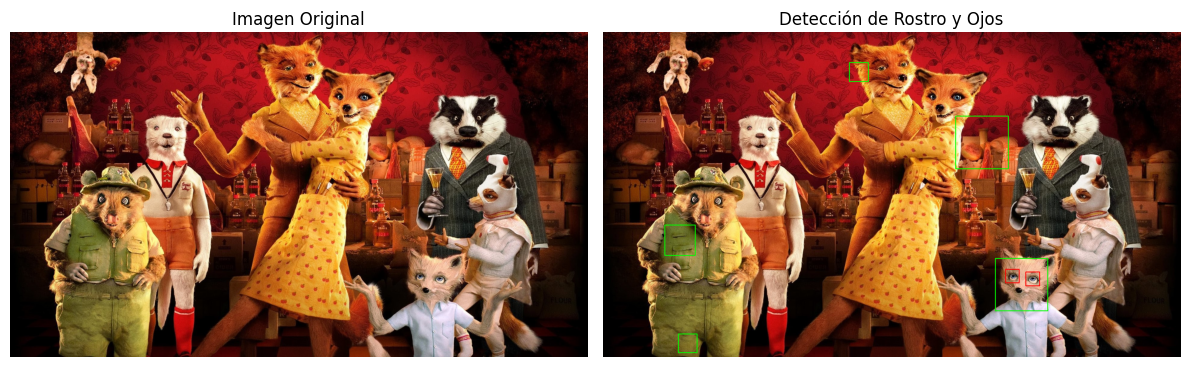

In [ ]:
# 6. Visualización de los resultados
plt.figure(figsize=(12, 6)) # Creamos una figura con tamaño específico

# Imagen original
plt.subplot(1, 2, 1) # Creamos u subplot en la posición 1
plt.title('Imagen Original') # Añadimos un título
plt.imshow(image_rgb) # Mostramos la imagen original
plt.axis('off') # Ocultamos los ejes

# Imagen con detecciones
plt.subplot(1, 2, 2) # Creamos iun subplot en la posición 2
plt.title('Detección de Rostro y Ojos') # Añadimos un título
plt.imshow(result_image) # Mostramos la imagen con las detecciones
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # Ajustamos el layout para que no se superpongan los títulos
plt.show() # Mostramos la figura completa